Исследовалось влияние конфликтов с родителями на уровень тревожности подростков. По частоте конфликтов подростков разделяли на тех, у кого практически не бывает конфликтов с родителями (в таблице они закодированы 1), тех, у кого они бывают иногда (закодированы 2), и тех, кто конфликтует постоянно (код 3). Уровень тревожности оценивался при помощи опросника Спилбергера-Ханина. 

Можно ли утверждать, что уровень тревожности различается в различных группах подростков. Как? Предложите содержательную интерпретацию полученных результатов.

In [1]:
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv('~/Documents/M/pets/data/psycho_data.csv', sep=';')

In [5]:
df.head()

,conflict level,anxiety level
0,1,11
1,1,16
2,1,15
3,1,16
4,1,11


In [6]:
df.shape

(39, 2)

In [23]:
df.columns

Index(['conflict level', 'anxiety level'], dtype='object')

In [24]:
df.rename(columns={'conflict level': 'conflict_level', 
                   'anxiety level':'anxiety_level'}, inplace=True)

In [25]:
df.head()

,conflict_level,anxiety_level
0,1,11
1,1,16
2,1,15
3,1,16
4,1,11


In [31]:
df.conflict_level.unique()

array([1, 2, 3])

In [32]:
df.conflict_level.value_counts()

conflict_level
1    13
2    13
3    13
Name: count, dtype: int64

In [33]:
df.anxiety_level.unique()

array([11, 16, 15, 12, 14, 17, 13, 18])

In [37]:
df.anxiety_level.value_counts()

anxiety_level
16    8
15    7
12    6
14    5
18    5
11    4
17    2
13    2
Name: count, dtype: int64

<Axes: xlabel='anxiety_level', ylabel='Count'>

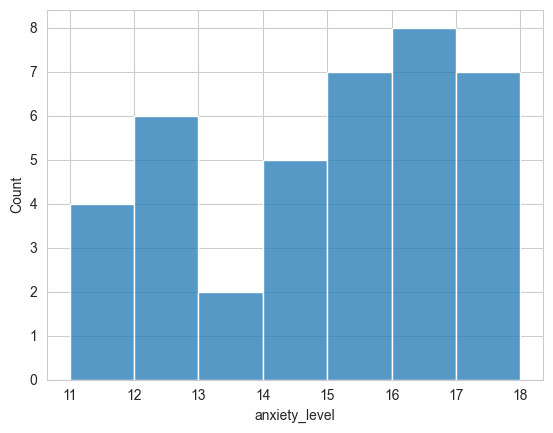

In [47]:
sns.histplot(df.anxiety_level)

<Axes: xlabel='conflict_level', ylabel='Count'>

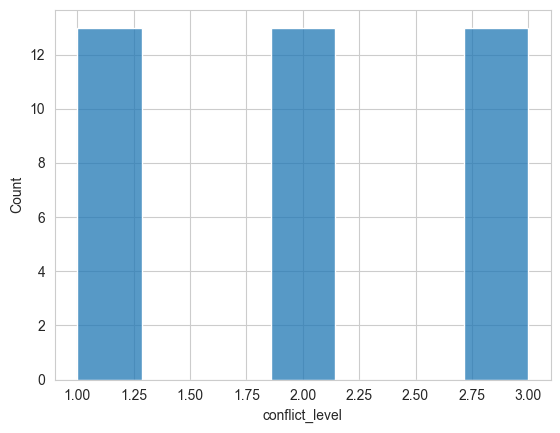

In [49]:
sns.histplot(df.conflict_level)

1. Проверить нормальность распределения
2. Проверить гомогенность дисперсий
3. Провести дисперсионный анализ

In [53]:
import scipy.stats as stats

for level in df['conflict_level'].unique():
    group = df[df['conflict_level'] == level]['anxiety_level']
    shapiro_test = stats.shapiro(group)
    print(f'Shapiro-Wilk Test for Group {level}: {shapiro_test}')

Shapiro-Wilk Test for Group 1: ShapiroResult(statistic=0.8253127510376944, pvalue=0.01384287002850645)
Shapiro-Wilk Test for Group 2: ShapiroResult(statistic=0.8851740333054305, pvalue=0.08382986855020516)
Shapiro-Wilk Test for Group 3: ShapiroResult(statistic=0.9569779391593659, pvalue=0.7065650572431919)


In [54]:
levene_test = stats.levene(df[df['conflict_level'] == 1]['anxiety_level'],
                           df[df['conflict_level'] == 2]['anxiety_level'],
                           df[df['conflict_level'] == 3]['anxiety_level'])
print(f'Levene\'s Test for Equality of Variances: {levene_test}')

Levene's Test for Equality of Variances: LeveneResult(statistic=0.054919908466819156, pvalue=0.9466401047351786)


In [55]:
kruskal_test = stats.kruskal(df[df['conflict_level'] == 1]['anxiety_level'],
                             df[df['conflict_level'] == 2]['anxiety_level'],
                             df[df['conflict_level'] == 3]['anxiety_level'])
print(f'Kruskal-Wallis Test: {kruskal_test}')

Kruskal-Wallis Test: KruskalResult(statistic=8.31864147455155, pvalue=0.015618163153756288)


Существуют значимые различия между группами

In [57]:
if kruskal_test.pvalue < 0.05:
    print("Уровень тревожности статистически значимо различается между группами.")
    
    alpha = 0.05 / 3  

    # Сравнение 1 vs 2
    u_stat, p_value = stats.mannwhitneyu(df[df['conflict_level'] == 1]['anxiety_level'],
                                         df[df['conflict_level'] == 2]['anxiety_level'])
    print(f'1 vs 2: p-value = {p_value}, significant = {p_value < alpha}')

    # Сравнение 1 vs 3
    u_stat, p_value = stats.mannwhitneyu(df[df['conflict_level'] == 1]['anxiety_level'],
                                         df[df['conflict_level'] == 3]['anxiety_level'])
    print(f'1 vs 3: p-value = {p_value}, significant = {p_value < alpha}')

    # Сравнение 2 vs 3
    u_stat, p_value = stats.mannwhitneyu(df[df['conflict_level'] == 2]['anxiety_level'],
                                         df[df['conflict_level'] == 3]['anxiety_level'])
    print(f'2 vs 3: p-value = {p_value}, significant = {p_value < alpha}')
else:
    print("Нет статистически значимого различия в уровнях тревожности между группами.")

Уровень тревожности статистически значимо различается между группами.
1 vs 2: p-value = 0.009387185799765378, significant = True
1 vs 3: p-value = 0.9169539932657004, significant = False
2 vs 3: p-value = 0.020985704550366396, significant = False


1 и 2: уровень тревожности значимо выше у тех, кто *иногда* конфликтует с родителями
1 и 3: уровень тревожности не отличается
2 и 3: уровень трежности не отличается

Возможная интерпретация:
Наличие конфликтов само по себе влияет на уровень тревожности, но когда конфликты становятся постоянными, подростки могут каким-то образом адаптироваться или другими способами справляться со стрессом, что нивелирует различие в тревожности по сравнению с группой, у которой конфликты бывают только иногда. 